In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
X = df.drop(['MedHouseVal'],axis = 1)
Y = df['MedHouseVal']

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [7]:
dg = X_train.join(Y_train)

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

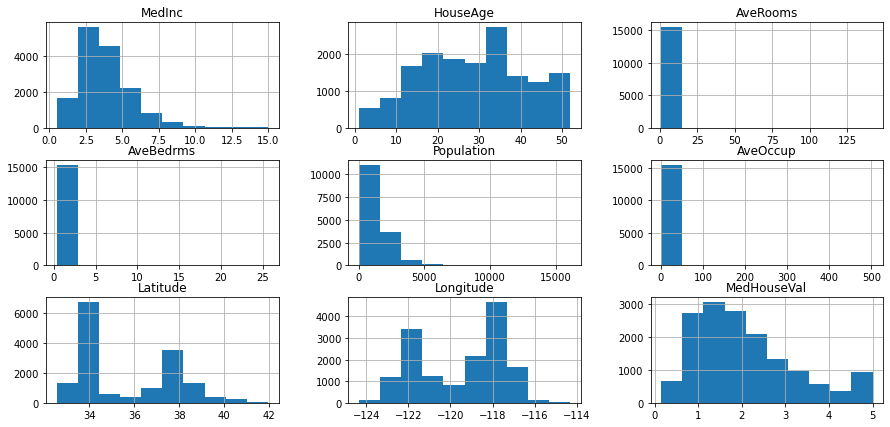

In [8]:
dg.hist(figsize=(15,7))

In [9]:
dg['AveRooms'] = np.log(dg['AveRooms'] + 1)
dg['AveBedrms'] = np.log(dg['AveBedrms'] + 1)
dg['Population'] = np.log(dg['Population'] + 1)
dg['AveOccup'] = np.log(dg['AveOccup'] + 1)

array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

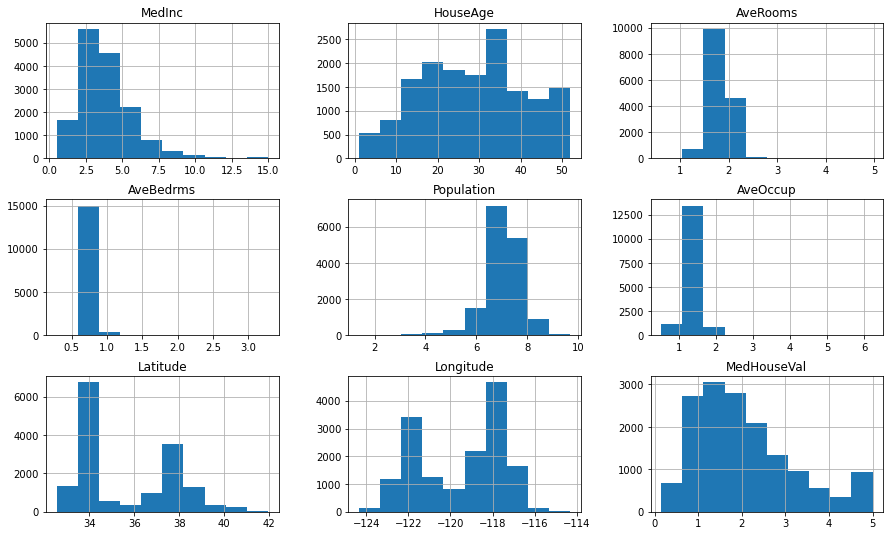

In [10]:
dg.hist(figsize=(15,9))

In [11]:
X_train , Y_train = dg.drop(['MedHouseVal'] , axis = 1),dg['MedHouseVal']
Data = LinearRegression()
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
Data.fit(X_trains , Y_train)


LinearRegression()

In [12]:
testdg = X_test.join(Y_test)

testdg['AveRooms'] = np.log(testdg['AveRooms'] + 1)
testdg['AveBedrms'] = np.log(testdg['AveBedrms'] + 1)
testdg['Population'] = np.log(testdg['Population'] + 1)
testdg['AveOccup'] = np.log(testdg['AveOccup'] + 1)

In [18]:
X_test , Y_test = testdg.drop(['MedHouseVal'] , axis = 1),testdg['MedHouseVal']
X_tests = scaler.transform(X_test)

In [19]:
y_pred = Data.predict(X_tests)


mse = mean_squared_error(Y_test, y_pred)
Score = Data.score(X_tests , Y_test)

print(f"Mean Squared Error: {mse}")
print(f"Score: {Score}")

Mean Squared Error: 0.45466642108353283
Score: 0.6476853338227444


C:\Users\farez\AppData\Local\Temp/ipykernel_22120/775365233.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='r')


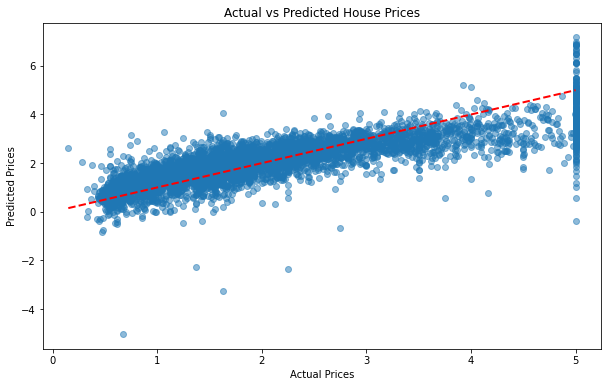

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='r')
plt.show()